In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as graph
from IPython.display import display

In [2]:
#sign in to plot.ly

import plotly
import plotly.plotly as py

py.sign_in('rahulsethi80','QdoT2yKN2RgbYgzHWkTK') #plotly API connection
print(plotly.__version__) #plotly version
plotly.offline.init_notebook_mode() #run at the start

2.1.0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
#Display GDP for 2009-2015

gdp = pd.read_excel('gdp_project.xlsx', sheetname='Total GDP')
gdp.head()

,Country Name,gdp_2009,gdp_2010,gdp_2011,gdp_2012,gdp_2013,gdp_2014,gdp_2015
0,Argentina,3.766279e+11,4.616402e+11,5.578902e+11,6.043785e+11,6.239320e+11,5.480549e+11,5.856000e+11
1,Australia,9.265638e+11,1.142251e+12,1.389919e+12,1.537478e+12,1.563951e+12,1.454675e+12,1.339539e+12
2,Austria,3.975943e+11,3.902351e+11,4.290107e+11,4.073730e+11,4.286986e+11,4.368875e+11,3.740559e+11
3,Belgium,4.845527e+11,4.835775e+11,5.269753e+11,4.978160e+11,5.213705e+11,5.312348e+11,4.540390e+11
4,Brazil,1.667020e+12,2.208872e+12,2.614573e+12,2.460658e+12,2.465774e+12,2.417046e+12,1.774725e+12


In [4]:
#Display Military Spendings for 2009-2015

military = pd.read_excel('military.xlsx', sheetname='Military Spendings')
military.head()

,Country Name,m_2009,m_2010,m_2011,m_2012,m_2013,m_2014,m_2015
0,Argentina,2.981852e+09,3.475348e+09,4.051930e+09,4.563218e+09,5.137974e+09,4.979443e+09,5.474613e+09
1,Australia,1.896014e+10,2.321769e+10,2.659720e+10,2.621658e+10,2.482526e+10,2.578371e+10,2.358765e+10
2,Austria,3.334755e+09,3.218351e+09,3.409721e+09,3.187227e+09,3.229066e+09,3.305159e+09,2.537077e+09
3,Belgium,5.620670e+09,5.244721e+09,5.499371e+09,5.168998e+09,5.229971e+09,5.191509e+09,4.168146e+09
4,Brazil,2.564881e+10,3.400294e+10,3.693621e+10,3.398701e+10,3.287479e+10,3.265961e+10,2.458420e+10


In [5]:
# The military spending of at least the top 10 nations 
#Sort top 10 countries for military spending for 2015

military_2015= military.sort_values(by='m_2015', ascending= False) 
highest_military = military_2015.head(10)
highest_military

,Country Name,m_2009,m_2010,m_2011,m_2012,m_2013,m_2014,m_2015
42,United States,6.685670e+11,6.981800e+11,7.113380e+11,6.847800e+11,6.397040e+11,6.099140e+11,5.960240e+11
7,China,1.056337e+11,1.157006e+11,1.379673e+11,1.574458e+11,1.778482e+11,1.996514e+11,2.147873e+11
33,Saudi Arabia,4.126720e+10,4.524453e+10,4.853093e+10,5.649787e+10,6.702000e+10,8.076240e+10,8.718587e+10
32,Russia,5.153212e+10,5.872023e+10,7.023752e+10,8.146940e+10,8.835290e+10,8.469650e+10,6.642079e+10
41,United Kingdom,5.791463e+10,5.808285e+10,6.027044e+10,5.849566e+10,5.686176e+10,5.918286e+10,5.546035e+10
18,India,3.872215e+10,4.609045e+10,4.963382e+10,4.721692e+10,4.740353e+10,5.091411e+10,5.125702e+10
14,France,6.688403e+10,6.178175e+10,6.460093e+10,6.003515e+10,6.241710e+10,6.361357e+10,5.085958e+10
22,Japan,5.146516e+10,5.465545e+10,6.076221e+10,6.001153e+10,4.902393e+10,4.586679e+10,4.088482e+10
15,Germany,4.747007e+10,4.625552e+10,4.814035e+10,4.647087e+10,4.593054e+10,4.610267e+10,3.939330e+10
37,South Korea,2.457566e+10,2.817518e+10,3.099171e+10,3.195176e+10,3.435411e+10,3.728622e+10,3.643491e+10


In [6]:
# Compare the data to that country’s GDP
# Military Spendings  vs GDP Comparison across 7 years.
# For comparison, I have taken a ratio of Military Spendings to GDP
gdp_military = pd.merge(highest_military, gdp, on='Country Name', how='inner')# merged Military Spending and GDP
for year in range(2009, 2016):            # for the Year 2009 - 2015
    gdp_military[str(year)+'_gdp_military']= gdp_military['m_'+str(year)]*100/gdp_military['gdp_'+str(year)]#taken Out Percentage

In [7]:
#Plotted Graph using Plotly
# Every Trace represents 1 year of Military Spending vs GDP
trace1 = graph.Bar(
    x=gdp_military['Country Name'],
    y=gdp_military['2009_gdp_military'],
    name='2009'
 )
trace2 = graph.Bar(
    x=gdp_military['Country Name'],
    y=gdp_military['2010_gdp_military'],
    name='2010'
)

trace3 = graph.Bar(
    x=gdp_military['Country Name'],
    y=gdp_military['2011_gdp_military'],
    name='2011'
)
trace4 = graph.Bar(
    x=gdp_military['Country Name'],
    y=gdp_military['2012_gdp_military'],
    name='2012'
)
trace5 = graph.Bar(
    x=gdp_military['Country Name'],
    y=gdp_military['2013_gdp_military'],
    name='2013'
)
trace6 = graph.Bar(
    x=gdp_military['Country Name'],
    y=gdp_military['2014_gdp_military'],
    name='2014'
)
trace7 = graph.Bar(
    x=gdp_military['Country Name'],
    y=gdp_military['2015_gdp_military'],
    name='2015'
)
data = [trace1, trace2, trace3, trace4, trace5,trace6, trace7]
layout = graph.Layout(
    barmode='group'
)

fig = graph.Figure(data=data, layout=layout)
py.iplot(fig, filename='group-bar')


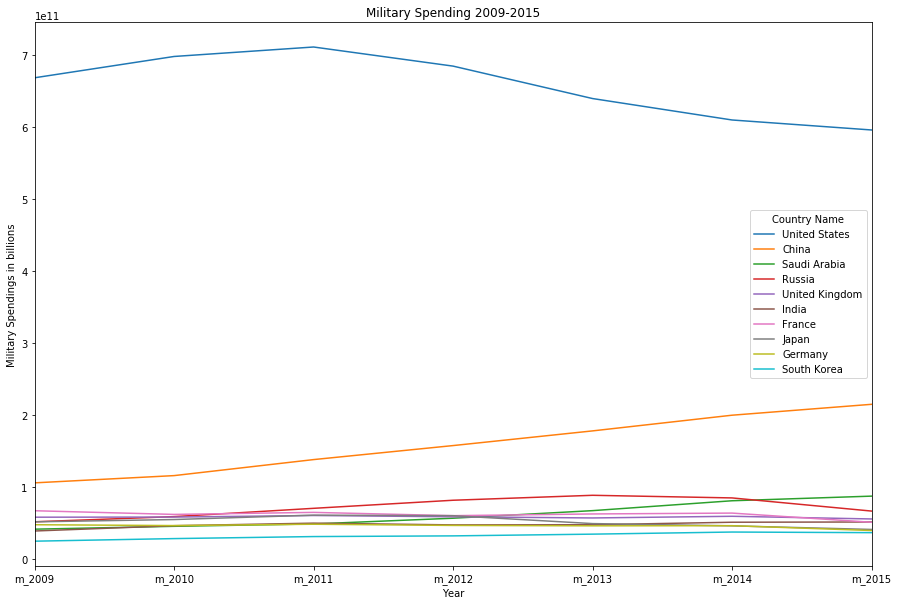

In [8]:
# Compare the data to the overall military spending of the all 10 countries
#Display military spending country wise from year 2009-2015
# Used Matplotlib to plot the Graph

militarytransposed = highest_military.set_index(['Country Name']).transpose()# transposing the data with respect to Country Name
militaryplot = militarytransposed.plot.line(legend=True, 
                                            figsize=(15,10),
                                            title='Military Spending 2009-2015')
militaryplot.set_ylabel('Military Spendings in billions')# labling the Graph
militaryplot.set_xlabel('Year')
plt.show()

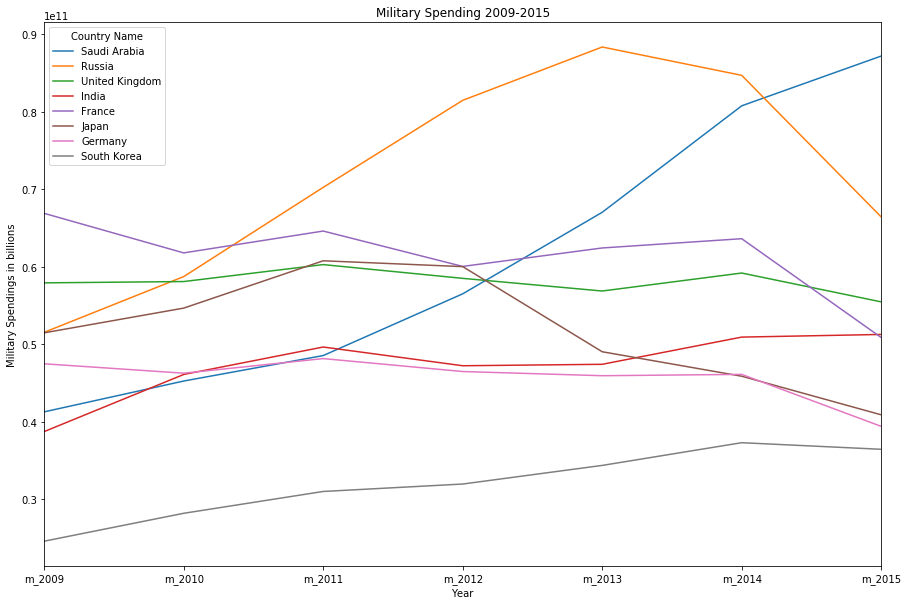

In [9]:
# removing USA and China from the list to see the other countries Spending
list_highest_military = highest_military.iloc[2:,]
list_highest_military

#Graphically representing

list_militarytransposed = list_highest_military.set_index(['Country Name']).transpose()
list_militaryplot = list_militarytransposed.plot.line(legend=True, 
                                            figsize=(15,10),
                                            title='Military Spending 2009-2015')
list_militaryplot.set_ylabel('Military Spendings in billions')
list_militaryplot.set_xlabel('Year')
plt.show()

In [10]:
# Compare the per person military spending to the per person GDP
# Reading Military Spendings Per Person Excel File
# Creating Country List to filter out data
militarypc = pd.read_excel('military.xlsx', sheetname='Military Per Capita')
country_list = ['United States','China', 'India','Russia','France','Japan','Germany','South Korea','Saudi Arabia','Unted Kingdom']
new_df = militarypc[militarypc['Country Name'].isin(country_list)]  
new_df

,Country Name,mpc_2009,mpc_2010,mpc_2011,mpc_2012,mpc_2013,mpc_2014,mpc_2015
7,China,79.205020,86.289693,102.336386,116.122099,132.020968,146.609445,155.585360
14,France,1067.737338,981.268002,1021.061416,944.516293,977.642096,992.082502,859.411989
15,Germany,589.546188,575.064893,598.576916,577.436052,570.099295,571.665343,493.410511
18,India,31.891552,37.441938,39.788348,37.367290,37.048512,39.307065,39.125482
22,Japan,404.152670,429.276906,477.491781,472.012071,386.060923,367.795823,324.738058
33,Saudi Arabia,1505.580676,1610.661845,1685.778622,1915.438590,2219.128069,2614.808487,2764.262472
42,United States,2176.098469,2253.093550,2277.080451,2175.289593,2017.128813,1909.270960,1852.263770


In [11]:
# Reading GDP Per Person Excel File
# Creating Country List to filter out data
gdppc = pd.read_excel('gdp_project.xlsx', sheetname='GDP Per Capita')
country_list = ['United States','China', 'India','Russia','France','Japan','Germany','South Korea','Saudi Arabia','Unted Kingdom']
_df = gdppc[gdppc['Country Name'].isin(country_list)]
_df

,Country Name,gpc_2009,gpc_2010,gpc_2011,gpc_2012,gpc_2013,gpc_2014,gpc_2015
7,China,3793.593690,4504.386978,5557.464720,6240.761179,7045.101546,7601.100851,7871.321185
14,France,43004.289674,42041.723993,45243.784557,42185.970078,43989.849204,44122.534781,40920.958209
15,Germany,42449.309152,42485.049672,46720.300965,43982.423631,46487.645051,47966.156594,42031.852038
18,India,1124.519446,1387.880084,1455.666779,1444.266598,1456.201628,1576.817669,1582.775853
22,Japan,39540.651906,43188.237253,46435.006090,46855.895122,38657.040036,36855.583881,32750.023056
32,Russia,178.166571,187.987391,206.570066,196.491273,187.972235,192.269599,178.086185
33,Saudi Arabia,15655.083368,18753.981233,23256.095613,24883.189715,24646.020873,24406.467822,20481.745322
37,South Korea,2325.997397,2514.342269,3886.264784,3444.232648,3258.270099,4135.986631,3530.249688
42,United States,46931.116649,48291.457843,49674.790229,51319.194586,52542.644972,54306.294201,55773.879038


In [12]:
# Military Spendings Per Person vs GDP Per Person Comparison across 7 years.
# Taking Ratio for Comarision
military_gdppc = pd.merge(new_df, _df, on='Country Name', how='left')# Merging files to another Dataset
military_gdppc
for year in range(2009, 2016):
    military_gdppc[str(year)+'_military_gdppc']=military_gdppc['mpc_'+str(year)]*100/military_gdppc['gpc_'+str(year)]

In [13]:
# Using Plotly to show the data Graphically
#Every Trace represents 1 year data Comaparision
trace1 = graph.Bar(
    x=military_gdppc['Country Name'],
    y=military_gdppc['2009_military_gdppc'],
    name='2009'
 )
trace2 = graph.Bar(
    x=military_gdppc['Country Name'],
    y=military_gdppc['2011_military_gdppc'],
    name='2010'
)

trace3 = graph.Bar(
    x=military_gdppc['Country Name'],
    y=military_gdppc['2011_military_gdppc'],
    name='2011'
)
trace4 = graph.Bar(
    x=military_gdppc['Country Name'],
    y=military_gdppc['2012_military_gdppc'],
    name='2012'
)
trace5 = graph.Bar(
    x=military_gdppc['Country Name'],
    y=military_gdppc['2013_military_gdppc'],
    name='2013'
)
trace6 = graph.Bar(
    x=military_gdppc['Country Name'],
    y=military_gdppc['2014_military_gdppc'],
    name='2014'
)
trace7 = graph.Bar(
    x=military_gdppc['Country Name'],
    y=military_gdppc['2015_military_gdppc'],
    name='2015'
)
data = [trace1, trace2, trace3, trace4, trace5,trace6, trace7]
layout = graph.Layout(
    barmode='group'
)

fig = graph.Figure(data=data, layout=layout)
py.iplot(fig, filename='group-bar')

In [21]:
# Single out the fastest growing countries in military spending in fixed value and in percentage
# Adding another Coloumn for Growth Rate
# Denotes how much country has increased or decreased in miltiary spendings from 2009 to 2015
highest_military['Growth Rate'] = ((highest_military['m_2015']-highest_military['m_2009']))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [22]:
#single out the fastest growing countries in military spending in fixed value and in percentage
growing = highest_military.sort_values(by='Growth Rate', ascending= False).head(10)
growing

,Country Name,m_2009,m_2010,m_2011,m_2012,m_2013,m_2014,m_2015,Growth Rate
7,China,1.056337e+11,1.157006e+11,1.379673e+11,1.574458e+11,1.778482e+11,1.996514e+11,2.147873e+11,1.091535e+11
33,Saudi Arabia,4.126720e+10,4.524453e+10,4.853093e+10,5.649787e+10,6.702000e+10,8.076240e+10,8.718587e+10,4.591867e+10
32,Russia,5.153212e+10,5.872023e+10,7.023752e+10,8.146940e+10,8.835290e+10,8.469650e+10,6.642079e+10,1.488867e+10
18,India,3.872215e+10,4.609045e+10,4.963382e+10,4.721692e+10,4.740353e+10,5.091411e+10,5.125702e+10,1.253486e+10
37,South Korea,2.457566e+10,2.817518e+10,3.099171e+10,3.195176e+10,3.435411e+10,3.728622e+10,3.643491e+10,1.185925e+10
41,United Kingdom,5.791463e+10,5.808285e+10,6.027044e+10,5.849566e+10,5.686176e+10,5.918286e+10,5.546035e+10,-2.454280e+09
15,Germany,4.747007e+10,4.625552e+10,4.814035e+10,4.647087e+10,4.593054e+10,4.610267e+10,3.939330e+10,-8.076773e+09
22,Japan,5.146516e+10,5.465545e+10,6.076221e+10,6.001153e+10,4.902393e+10,4.586679e+10,4.088482e+10,-1.058034e+10
14,France,6.688403e+10,6.178175e+10,6.460093e+10,6.003515e+10,6.241710e+10,6.361357e+10,5.085958e+10,-1.602445e+10
42,United States,6.685670e+11,6.981800e+11,7.113380e+11,6.847800e+11,6.397040e+11,6.099140e+11,5.960240e+11,-7.254300e+10


In [23]:
#plot graph for fastest grw
data = [graph.Bar(
    x=growing['Country Name'],
    y=growing['Growth Rate']
)]

py.iplot(data, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~rahulsethi80/0 or inside your plot.ly account where it is named 'basic-bar'


In [31]:
# Growth Percentage
highest_military['Growth Rate'] = ((highest_military['m_2015']-highest_military['m_2009'])*100 /highest_military['m_2009'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [32]:
growing = highest_military.sort_values(by='Growth Rate', ascending= False).head(10)
growing

,Country Name,m_2009,m_2010,m_2011,m_2012,m_2013,m_2014,m_2015,Growth Rate
33,Saudi Arabia,4.126720e+10,4.524453e+10,4.853093e+10,5.649787e+10,6.702000e+10,8.076240e+10,8.718587e+10,111.271583
7,China,1.056337e+11,1.157006e+11,1.379673e+11,1.574458e+11,1.778482e+11,1.996514e+11,2.147873e+11,103.332097
37,South Korea,2.457566e+10,2.817518e+10,3.099171e+10,3.195176e+10,3.435411e+10,3.728622e+10,3.643491e+10,48.256074
18,India,3.872215e+10,4.609045e+10,4.963382e+10,4.721692e+10,4.740353e+10,5.091411e+10,5.125702e+10,32.371294
32,Russia,5.153212e+10,5.872023e+10,7.023752e+10,8.146940e+10,8.835290e+10,8.469650e+10,6.642079e+10,28.892027
41,United Kingdom,5.791463e+10,5.808285e+10,6.027044e+10,5.849566e+10,5.686176e+10,5.918286e+10,5.546035e+10,-4.237755
42,United States,6.685670e+11,6.981800e+11,7.113380e+11,6.847800e+11,6.397040e+11,6.099140e+11,5.960240e+11,-10.850521
15,Germany,4.747007e+10,4.625552e+10,4.814035e+10,4.647087e+10,4.593054e+10,4.610267e+10,3.939330e+10,-17.014451
22,Japan,5.146516e+10,5.465545e+10,6.076221e+10,6.001153e+10,4.902393e+10,4.586679e+10,4.088482e+10,-20.558262
14,France,6.688403e+10,6.178175e+10,6.460093e+10,6.003515e+10,6.241710e+10,6.361357e+10,5.085958e+10,-23.958554


In [33]:
data = [graph.Bar(
    x=growing['Country Name'],
    y=growing['Growth Rate']
)]

py.iplot(data, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~rahulsethi80/0 or inside your plot.ly account where it is named 'basic-bar'
